In [5]:
import json
>>> with open('output.json') as f:
...     data = json.load(f)
...     
>>> with open('links.json') as f:
...     links = json.load(f)
...

In [7]:
ARGUMENT_PARSERS = ['argparse', 'optparse', 'argv', 'click', 'docopt']
parsed = []
for el in data:
    for repo in links:
        if el['link'] == repo['repo']:
            for key in el:
                if key in ARGUMENT_PARSERS:
                    repo[key] = el[key]
            parsed.append(repo)
            break
print(len(parsed))

229


In [8]:
with open('parsed.json', 'w') as fp:
    json.dump(parsed, fp)

In [31]:
%matplotlib inline
import seaborn as sns
import json
import pandas as pd
from collections import defaultdict
ARGUMENT_PARSERS = ['argparse', 'optparse', 'argv', 'click', 'docopt']
with open('joined.json') as f:
    data = json.load(f)
results = defaultdict(int)
for repo in data:
    for key in ARGUMENT_PARSERS:
        if key in repo.keys():
            results[key] += repo[key]
results = dict(results)
print(results)
df = pd.DataFrame(list(results.items()), columns=['argument_parser', 'occurences'])
# df = pd.DataFrame([results])
# df.columns = ['argument_parser', 'occurences']
print(df)
# sns.barplot(data=df)
sns.barplot(x='argument_parser', y='occurences', data=df)

{'optparse': 130, 'docopt': 47, 'argparse': 727, 'argv': 804, 'click': 85}
  argument_parser  occurences
0        optparse         130
1          docopt          47
2        argparse         727
3            argv         804
4           click          85


    argument_parser  downloads  occurences
0            docopt        494           2
1          argparse         73           2
2              argv        693           2
3             click        293           1
5              argv        851           1
7          optparse         78           1
11           docopt        152          12
12             argv        149           1
13           docopt        373           3
14             argv         53           1
15         argparse        182           1
17         optparse        398           1
18             argv        318           3
19             argv        690           1
20             argv        262           3
23             argv        959           3
24         argparse        173           2
25             argv       1853           3
26         optparse        718           1
27             argv        183           3
32             argv        502           2
34             argv       1853           3
35         

c:\python34\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


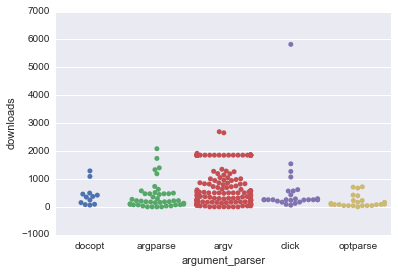

In [7]:
%matplotlib inline
import seaborn as sns
import json
import pandas as pd
from collections import defaultdict
ARGUMENT_PARSERS = ['argparse', 'optparse', 'argv', 'click', 'docopt']
with open('joined.json') as f:
    data = json.load(f)

COLUMNS = ['argument_parser', 'downloads', 'occurences']
df = pd.DataFrame(columns=COLUMNS)
for i, repo in enumerate(data):
    for key in ARGUMENT_PARSERS:
        if key in repo.keys():
            df.loc[i] = [key, repo['ndownloads'], repo[key]]
print(df)
# sns.barplot(data=df)
sns.swarmplot(x='argument_parser', y='downloads', data=df)

In [1]:
with open('joined.json') as f:
    data = json.load(f)
repos_with_tools = filter(lambda repo: 'tool' in repo['description'], data)
top = sorted(repos_with_tools, key=lambda repo: repo['ndownloads'], reverse=True)
print top